In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

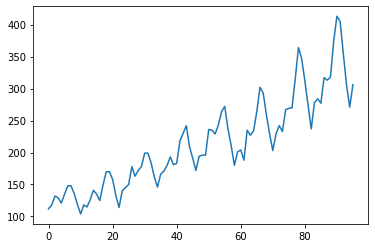

In [4]:
data.Passengers.plot()

In [5]:
data['month'] = pd.DatetimeIndex(data['Month']).month
data.head()
pd.DataFrame(data)

,Month,Passengers,month
0,1995-01-01,112,1
1,1995-02-01,118,2
2,1995-03-01,132,3
3,1995-04-01,129,4
4,1995-05-01,121,5
...,...,...,...
91,2002-08-01,405,8
92,2002-09-01,355,9
93,2002-10-01,306,10
94,2002-11-01,271,11


In [6]:
data['month_sqr'] = data[['month']].sum(axis=1).apply(np.square)
data

,Month,Passengers,month,month_sqr
0,1995-01-01,112,1,1
1,1995-02-01,118,2,4
2,1995-03-01,132,3,9
3,1995-04-01,129,4,16
4,1995-05-01,121,5,25
...,...,...,...,...
91,2002-08-01,405,8,64
92,2002-09-01,355,9,81
93,2002-10-01,306,10,100
94,2002-11-01,271,11,121


In [7]:
data['log_pass'] = data[['Passengers']].sum(axis=1).apply(np.log)
data

,Month,Passengers,month,month_sqr,log_pass
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791
...,...,...,...,...,...
91,2002-08-01,405,8,64,6.003887
92,2002-09-01,355,9,81,5.872118
93,2002-10-01,306,10,100,5.723585
94,2002-11-01,271,11,121,5.602119


In [9]:
df= pd.get_dummies(data['month'])
pd.DataFrame(df)

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,1,0,0,0,0
92,0,0,0,0,0,0,0,0,1,0,0,0
93,0,0,0,0,0,0,0,0,0,1,0,0
94,0,0,0,0,0,0,0,0,0,0,1,0


In [10]:
df.columns = ["jan","feb","march","april","may","june","july","august","sep","oct","nov","dec"]
df.head()

,jan,feb,march,april,may,june,july,august,sep,oct,nov,dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [11]:
data1= pd.concat([data,df],axis=1)
data2 = pd.DataFrame(data1)
data2

,Month,Passengers,month,month_sqr,log_pass,jan,feb,march,april,may,june,july,august,sep,oct,nov,dec
0,1995-01-01,112,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,8,64,6.003887,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,9,81,5.872118,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,10,100,5.723585,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,11,121,5.602119,0,0,0,0,0,0,0,0,0,0,1,0


In [12]:
Train = data1.head(84)
Test = data1.tail(12)

In [13]:
#Linear Model
import statsmodels.formula.api as smf 

In [14]:
linear_model = smf.ols('Passengers~month',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['month'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

138.51789251009663

In [15]:
#Exponential

Exp = smf.ols('log_pass~month',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['month'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

146.46218328653816

In [16]:
#Quadratic 

Quad = smf.ols('Passengers~month+month_sqr',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["month","month_sqr"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

135.1986251767838

In [17]:
#Additive seasonality 

add_sea = smf.ols('Passengers~jan+feb+march+april+may+june+july+august+sep+oct+nov+dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['jan','feb','march','april','may','june','july','august','sep','oct','nov','dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421817

In [18]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~month+month_sqr+jan+feb+march+april+may+june+july+august+sep+oct+nov+dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['jan','feb','march','april','may','june','july','august','sep','oct','nov','dec','month','month_sqr']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

132.81978481421888

In [19]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_pass~jan+feb+march+april+may+june+july+august+sep+oct+nov+dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708646

In [20]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,rmse_add_sea,132.819785
4,rmse_add_sea_quad,132.819785
2,rmse_Quad,135.198625
0,rmse_linear,138.517893
5,rmse_Mult_sea,140.063202
1,rmse_Exp,146.462183


In [ ]:
# rmse value for model additive seasonality is lower than other model.
# therefore model add_sea used for forecasing
